In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Examlpe 1

# Finding the value of theta using Gradient Descent

In [ ]:
import numpy as np

def gradient_descent(X, y, learning_rate=0.01, num_iterations=2000):
    # Add intercept term to X
    X = np.column_stack((np.ones(len(X)), X))
    # np.ones(len(X)) creates a column vector of ones (for the intercept term)
    # np.column_stack(...) adds this column to X,
    # ensuring each sample has an additional feature representing the intercept (bias term).

    # Initialize theta with zeros
    theta = np.zeros((X.shape[1], 1))
    #X.shape[1] gives the number of features (including the added intercept)
    #np.zeros((X.shape[1], 1)) initializes the parameter vector theta with zeros.

    m = len(y)
    #Stores the number of training examples . this will be used to compute mean in GD

    for i in range(num_iterations):
        # Compute predictions
        predictions = np.dot(X, theta)
        # y_pred = X.theta
        # np.dot is used to performs matrix multiplication to compute predicted values.

        # Compute errors
        errors = predictions - y
        # error= y_pred - y_actual

        # Compute gradient
        gradient = (1 / m) * np.dot(X.T, errors)
        # recall gradient = 1/m * Transpose of X . error
        # X.T: Transpose of X


        theta -= learning_rate * gradient
        # final weight= initial weight - α * gardient


    return theta

# Now final values of theta can be used to compute predicted values for all training samples
def predict(X, theta):
    # Add intercept term to X
    X = np.column_stack((np.ones(len(X)), X))

    # Predict y values
    y_pred = np.dot(X, theta)
    return y_pred

#
def mean_squared_error(y_true, y_pred):
    # Calculate mean squared error
    mse = np.mean((y_true - y_pred)**2)
    # recall: MSE = 1/m [sum thorugh 1 to m (y_actual - y_pred)^2 ]
    return mse

# Example usage:
# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Feature
#  reshapes the array into a 2D column vector.
# -1: tells NumPy to automatically infer the number of rows based on the original size
# 1: 1 column is needed
# so now original 1D arraywith shape (5,) i.e. 5 elements in a single row
# is converted to 2D column vector of shape (5,1), meaning 5 rows and 1 column.

y = np.array([2, 4, 5, 4, 5]).reshape(-1, 1)  # Target variable
print("Features")
print(X)
print("Target Variables")
print(y)

# Train the model using gradient descent
theta = gradient_descent(X, y)

# Make predictions using final weights (theta)
y_pred = predict(X, theta)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)
# MSE is a cost function  that is used in GD.
# It measures how well the model’s predictions match the actual values.

print("Model coefficients (theta):", theta.flatten())
print("Mean Squared Error:", mse)

Features
[[1]
 [2]
 [3]
 [4]
 [5]]
Target Variables
[[2]
 [4]
 [5]
 [4]
 [5]]
Model coefficients (theta): [2.13593338 0.61774543]
Mean Squared Error: 0.4807470965220588


# Example 2

# Logistic Regression

# The Heart Disease Dataset
File name: 'D6_Heart_Dataset_2.csv'

This dataset has been obtained from Kaggle.

The dataset contains 303 observations with 13 features and 1 class label with 0 and 1 values.
These features are discussed below:
1. age: in years
2. gender: (1 = male; 0 = female)
3. cp: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
4. trestbps: resting blood pressure, in mm Hg on admission to the hospital
5. chol: serum cholestrol in mg/dl
6. fbs: fasting blood sugar, 120 mg.dl (1 = true; 0 = false)
7. restecg: restinng electrocardiographic results (values: 0,1,2)
8. thalach: maximum heart ache achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) coloured by flouroscopy
13. thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. target: the predicted attribute, diagnosis of heart disease (0 = fit; 1 = diseased)

This is a binary classification problem.
Does not contain any categorical data, the dataset is clean. sed)

In [ ]:
import pandas as pd
PATH = '/content/drive/MyDrive/MLPractical'
data=pd.read_csv(f'{PATH}/D6_Heart_Dataset_2.csv')

#Displaying the read contents
data

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Displaying general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# separating predictors
X = data.drop("target",axis=1)
X

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
# separating target
Y = data["target"]
Y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [ ]:
data["target"].unique() # two output classes #1 Disease, 0 - No Disease

array([1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
# splitting dataset
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20,random_state=0)
# Running the code multiple times will always produce the same output for X_train and X_test
# because random_state=0 ensures the split is deterministic.
print(X_train.shape )
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [ ]:
from sklearn.linear_model import LogisticRegression
# model instantiation
model = LogisticRegression()
# taring the model
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Standardization is needed

In [ ]:
from sklearn.preprocessing import StandardScaler
# 🚀 Standardize all features in one go
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on train, transform train
X_test = scaler.transform(X_test)  # Use same scaler on test data

In [ ]:
#  original X
X

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
# after standardization
X_train

array([[-1.32773282, -1.43641607,  0.98584243, ..., -0.66169316,
        -0.70710678, -0.46472917],
       [ 1.24903178, -1.43641607,  0.98584243, ..., -0.66169316,
         0.26516504, -0.46472917],
       [ 0.35276583,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       ...,
       [ 0.12869935,  0.69617712,  1.94013791, ..., -0.66169316,
        -0.70710678,  1.14190596],
       [-0.87959984,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       [ 0.35276583,  0.69617712,  0.03154696, ..., -0.66169316,
        -0.70710678, -0.46472917]])

In [ ]:
# Train Logistic Regression
model = LogisticRegression(max_iter=500)  # Increase max_iter
model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [ ]:
# Make predictions
Y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[21  6]
 [ 3 31]]


In [ ]:
# checking predcition prob of trained model
y_proba = model.predict_proba(X_test)
y_proba

array([[0.96356682, 0.03643318],
       [0.20986864, 0.79013136],
       [0.19958472, 0.80041528],
       [0.98065946, 0.01934054],
       [0.9033281 , 0.0966719 ],
       [0.55547826, 0.44452174],
       [0.92143894, 0.07856106],
       [0.88954481, 0.11045519],
       [0.99509765, 0.00490235],
       [0.99719484, 0.00280516],
       [0.25263569, 0.74736431],
       [0.0520725 , 0.9479275 ],
       [0.96622679, 0.03377321],
       [0.15675557, 0.84324443],
       [0.02751165, 0.97248835],
       [0.31008345, 0.68991655],
       [0.93381962, 0.06618038],
       [0.291586  , 0.708414  ],
       [0.99324703, 0.00675297],
       [0.17102583, 0.82897417],
       [0.17771755, 0.82228245],
       [0.64508053, 0.35491947],
       [0.90808104, 0.09191896],
       [0.87338786, 0.12661214],
       [0.1138556 , 0.8861444 ],
       [0.39341465, 0.60658535],
       [0.82271249, 0.17728751],
       [0.61514071, 0.38485929],
       [0.01499054, 0.98500946],
       [0.34022532, 0.65977468],
       [0.

# Visualization


Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61


Confusion Matrix:
 [[21  6]
 [ 3 31]]


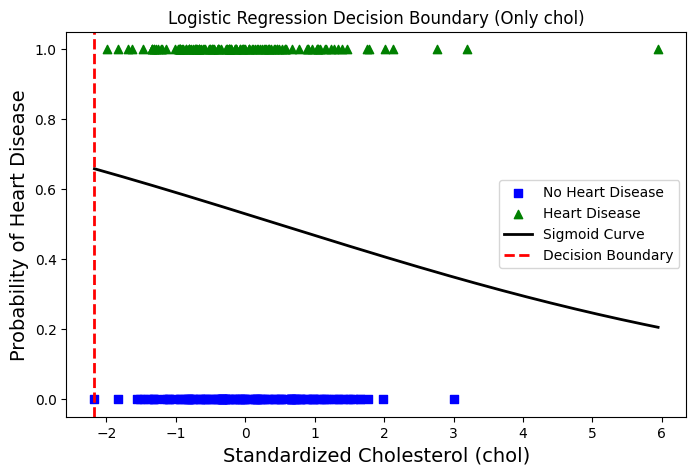

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---- Load Data ----
PATH = '/content/drive/MyDrive/MLPractical'
data = pd.read_csv(f'{PATH}/D6_Heart_Dataset_2.csv')

X = data.drop("target", axis=1)
Y = data["target"]

# ---- Train-Test Split ----
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Standardize all features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on train, transform train
X_test = scaler.transform(X_test)  # Use same scaler on test data

# Train Logistic Regression
model = LogisticRegression(max_iter=500)  # Increased max_iter
model.fit(X_train, Y_train)

# Predictions & Evaluation
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# ---- Extract Feature "chol" (Standardized) ----
feature_index = list(X.columns).index("chol")  # Get correct index of "chol"
X_feature = X_train[:, feature_index].reshape(-1, 1)  # Extract "chol" after standardization

# Generate new feature values for smooth probability curve (Standardized)
X_new = np.linspace(X_feature.min(), X_feature.max(), 300).reshape(-1, 1)

# Predict probability using only "chol"
X_dummy = np.zeros((300, X_train.shape[1]))  # Create zero matrix for all features
X_dummy[:, feature_index] = X_new.flatten()  # Set only "chol" feature

y_proba = model.predict_proba(X_dummy)[:, 1]  # Probability of class 1

# ---- Plot Decision Boundary ----
plt.figure(figsize=(8, 5))
plt.scatter(X_feature[Y_train == 0], Y_train[Y_train == 0], color='blue', marker='s', label="No Heart Disease")
plt.scatter(X_feature[Y_train == 1], Y_train[Y_train == 1], color='green', marker='^', label="Heart Disease")
plt.plot(X_new, y_proba, "k-", linewidth=2, label="Sigmoid Curve")  # Sigmoid curve

# Decision boundary (probability = 0.5)
decision_boundary = X_new[y_proba >= 0.5][0]
plt.axvline(decision_boundary, color='r', linestyle="--", linewidth=2, label="Decision Boundary")

plt.xlabel("Standardized Cholesterol (chol)", fontsize=14)
plt.ylabel("Probability of Heart Disease", fontsize=14)
plt.legend()
plt.title("Logistic Regression Decision Boundary (Only chol)")
plt.show()


# Example 3

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[100   0]
 [  0 100]]


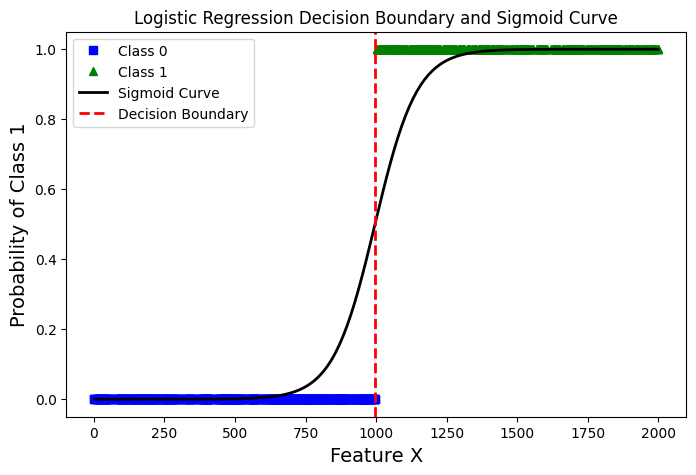

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
PATH = '/content/drive/MyDrive/MLPractical'
df=pd.read_csv(f'{PATH}/binary_classification_data.csv')
#df = pd.read_csv("binary_classification_data.csv")
X = df[["X"]].values  # Input feature
Y = df["Y"].values    # Target variable

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

# ---- Plot Sigmoid Curve and Decision Boundary ----
X_new = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)  # Smooth range for plotting
X_new_scaled = scaler.transform(X_new)  # Scale using same scaler

# Predict probability
y_proba = model.predict_proba(X_new_scaled)[:, 1]

# Plot the sigmoid curve
plt.figure(figsize=(8, 5))
plt.plot(X[Y == 0], Y[Y == 0], "bs", label="Class 0")  # Blue squares for class 0
plt.plot(X[Y == 1], Y[Y == 1], "g^", label="Class 1")  # Green triangles for class 1
plt.plot(X_new, y_proba, "k-", linewidth=2, label="Sigmoid Curve")  # Sigmoid curve

# Decision boundary (probability = 0.5)
decision_boundary = X_new[y_proba >= 0.5][0]
plt.axvline(decision_boundary, color='r', linestyle="--", linewidth=2, label="Decision Boundary")

plt.xlabel("Feature X", fontsize=14)
plt.ylabel("Probability of Class 1", fontsize=14)
plt.legend()
plt.title("Logistic Regression Decision Boundary and Sigmoid Curve")
plt.show()


# Example 4

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that
contains the sepal and petal length and width of 150 iris flowers of three different
species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal
width feature. First let’s load the data:

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
features = iris["feature_names"]
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
target = iris["target_names"]
target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
y = iris["target"] # 3 possible classes
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# converting the problem to a binary classification problem

In [ ]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

Let’s look at the model’s estimated probabilities for flowers with petal widths varying
from 0 to 3 cm

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = model.predict_proba(X_new)
y_proba



array([[9.99249051e-01, 7.50949397e-04],
       [9.99239224e-01, 7.60776030e-04],
       [9.99229269e-01, 7.70731151e-04],
       ...,
       [3.08499021e-03, 9.96915010e-01],
       [3.04523414e-03, 9.96954766e-01],
       [3.00598887e-03, 9.96994011e-01]])

<ipython-input-33-250f9ed8cf4e>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2, color='red')


Text(0, 0.5, 'Probability')

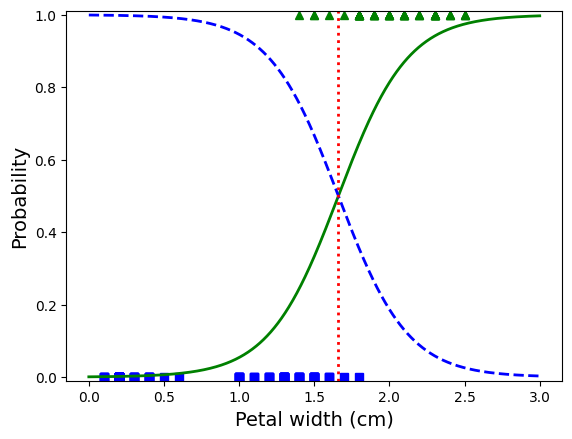

In [ ]:
plt.ylim(-0.01, 1.01)
plt.plot(X[y==0], y[y==0], "bs") # ,"bs" : argument is color code for blue square at bottom
plt.plot(X[y==1], y[y==1], "g^") # "g^": argument is color code for greentriangle at top
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica") # green solid curve
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica") # blue dashed curve
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
#print(decision_boundary)
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2, color='red')
# vertical red line
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)


The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4
cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a
smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap.
Above about 2 cm the classifier is highly confident that the flower is an Iris-
Virginica (it outputs a high probability to that class), while below 1 cm it is highly
confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica”
class). In between these extremes, the classifier is unsure. However, if you ask it to
predict the class (using the predict() method rather than the predict_proba()
method), it will return whichever class is the most likely. Therefore, there is a decision
boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal
width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-
Virginica, or else it will predict that it is not (even if it is not very confident):

In [ ]:
model.predict([[1.7], [1.5]])

array([1, 0])

# Finding the value of theta using Gradient Descent

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent_logistic(X, y, learning_rate=0.01, num_iterations=2000):
    # Add intercept term to X
    X = np.column_stack((np.ones(len(X)), X))

    # Initialize theta with zeros
    theta = np.zeros((X.shape[1], 1))

    m = len(y)

    for i in range(num_iterations):
        # Compute predictions
        z = np.dot(X, theta)
        predictions = sigmoid(z)

        # Compute errors
        errors = predictions - y

        # Compute gradient
        gradient = (1 / m) * np.dot(X.T, errors)

        # Update theta
        theta -= learning_rate * gradient

    return theta

def predict_logistic(X, theta):
    # Add intercept term to X
    X = np.column_stack((np.ones(len(X)), X))
    # Predict probabilities
    z = np.dot(X, theta)
    probabilities = sigmoid(z)
    # Convert probabilities to binary predictions
    binary_predictions = (probabilities >= 0.5).astype(int)
    return binary_predictions

# Example usage:
# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Feature
y = np.array([0, 0, 1, 1, 1]).reshape(-1, 1)  # Target variable (binary)

print("Features")
print(X)
print("Target Variables")
print(y)

# Train the model using gradient descent
theta = gradient_descent_logistic(X, y)

# Make predictions
y_pred = predict_logistic(X, theta)

print("Model coefficients (theta):", theta.flatten())
print("Predictions:", y_pred.flatten())


Features
[[1]
 [2]
 [3]
 [4]
 [5]]
Target Variables
[[0]
 [0]
 [1]
 [1]
 [1]]
Model coefficients (theta): [-1.98352644  1.01596286]
Predictions: [0 1 1 1 1]


# Using Logistic Regression on iris dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
PATH = '/content/drive/MyDrive/MLPractical'
data=pd.read_csv(f'{PATH}/iris_preprocessed.csv')
#Displaying the read contents
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# Displaying general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# separating predictors
X = data.drop("target",axis=1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# separating target
Y = data["target"] # 3 classes 0, 1 and 2
Y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.20,random_state=0)
# Running the code multiple times will always produce the same output for X_train and X_test
# because random_state=0 ensures the split is deterministic.
print(X_train.shape )
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
# Standardization / Normalization can be applied if needed
  #scaler = StandardScaler()
  #X_train = scaler.fit_transform(X_train)
  #X_test = scaler.transform(X_test)



In [ ]:
# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Make predictions
Y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [ ]:
# checking predcition prob of trained model
y_proba = model.predict_proba(X_test)
y_proba

array([[1.12775255e-04, 5.89414102e-02, 9.40945815e-01],
       [1.22146693e-02, 9.64698407e-01, 2.30869240e-02],
       [9.86741531e-01, 1.32584364e-02, 3.27257554e-08],
       [1.19909941e-06, 2.30954932e-02, 9.76903308e-01],
       [9.72139375e-01, 2.78604940e-02, 1.31184305e-07],
       [1.85345654e-06, 6.05090141e-03, 9.93947245e-01],
       [9.83538505e-01, 1.64614369e-02, 5.78071427e-08],
       [2.91425012e-03, 7.41762308e-01, 2.55323442e-01],
       [1.54360617e-03, 7.37617620e-01, 2.60838774e-01],
       [2.06800688e-02, 9.38081721e-01, 4.12382101e-02],
       [9.53758192e-05, 1.93870023e-01, 8.06034601e-01],
       [7.08471741e-03, 8.10403580e-01, 1.82511702e-01],
       [3.90785834e-03, 8.17963831e-01, 1.78128310e-01],
       [3.09239773e-03, 7.63318164e-01, 2.33589438e-01],
       [3.76784327e-03, 7.33711837e-01, 2.62520319e-01],
       [9.83856452e-01, 1.61435027e-02, 4.50336709e-08],
       [6.55441932e-03, 7.73505136e-01, 2.19940445e-01],
       [1.03784697e-02, 8.74080

# Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm


# Visulaization

In [ ]:
#Plot Decision Boundary (for visualization, using only first two features)
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary of Logistic Regression")
    plt.show()

In [ ]:
plot_decision_boundary(X_train[:, :2], Y_train, model)

InvalidIndexError: (slice(None, None, None), slice(None, 2, None))

In [ ]:

from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Convert to a Pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target labels
df["target"] = iris.target

# Save as CSV file
csv_filename = "iris_dataset.csv"
df.to_csv(csv_filename, index=False)

print(f"Dataset saved as {csv_filename}")

Dataset saved as iris_dataset.csv


In [ ]:
!pwd

/content


In [ ]:
# Step 1: Load the dataset
iris = load_iris()
X = iris.data  # Features (4 features per sample)
y = iris.target  # Target labels (0, 1, or 2 - three classes)

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
iris = load_iris()
X = iris.data  # Features (4 features per sample)
y = iris.target  # Target labels (0, 1, or 2 - three classes)

# Step 2: Select only two classes for binary classification (for simplicity)
X = X[y != 2]  # Remove class '2'
y = y[y != 2]  # Keep only classes 0 and 1

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Normalize (Standardize) the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Step 9: Plot Decision Boundary (for visualization, using only first two features)
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary of Logistic Regression")
    plt.show()

# Plot using only first two features
plot_decision_boundary(X_train[:, :2], y_train, model)


Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:
 [[12  0]
 [ 0  8]]


ValueError: X has 2 features, but LogisticRegression is expecting 4 features as input.